In [1]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [ ]:
df = pd.read_csv('../data/checker_timestamp.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = (df['timestamp']).dt.date
df.head()

,timestamp,date
0,2020-04-17 05:19:02.744528,2020-04-17
1,2020-04-17 05:22:35.249331,2020-04-17
2,2020-04-17 05:22:45.549397,2020-04-17
3,2020-04-17 05:34:14.691200,2020-04-17
4,2020-04-17 05:34:24.422370,2020-04-17
...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21
3203,2020-05-21 20:22:41.785725,2020-05-21
3204,2020-05-21 20:22:41.877806,2020-05-21
3205,2020-05-21 20:37:00.129678,2020-05-21


In [3]:
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT 
    date,
    COUNT(CASE WHEN CAST(strftime('%H', timestamp) AS INTEGER) < 12 THEN 1 END) as am,
    COUNT(CASE WHEN CAST(strftime('%H', timestamp) AS INTEGER) >= 12 THEN 1 END) as pm,
    CASE 
        WHEN strftime('%w', date) IN ('0', '6') THEN 'weekend'
        ELSE 'working_day'
    END AS target
FROM df
GROUP BY date
"""

df = pysqldf(query)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    35 non-null     object
 1   am      35 non-null     int64 
 2   pm      35 non-null     int64 
 3   target  35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


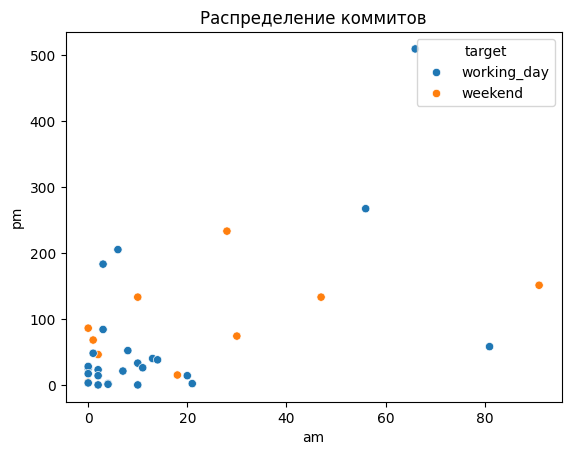

In [4]:
sns.scatterplot(x='am', y='pm', hue='target', data=df)
plt.title("Распределение коммитов")  
plt.xlabel("am")  
plt.ylabel("pm")  
plt.show()  

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.

In [5]:
df['target'] = df['target'].map({'weekend': 0, 'working_day': 1}).astype(int)
X = df[['am', 'pm']]
y = df['target']

In [6]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
df['prediction'] = model.predict(X)
df['target'] = df['target'].map({0: 'weekend', 1: 'working_day'})
df['prediction'] = df['prediction'].map({0: 'weekend', 1: 'working_day'})
df.head()

,date,am,pm,target,prediction
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


In [10]:
df.to_csv('../data/am_pm.csv', index=False)

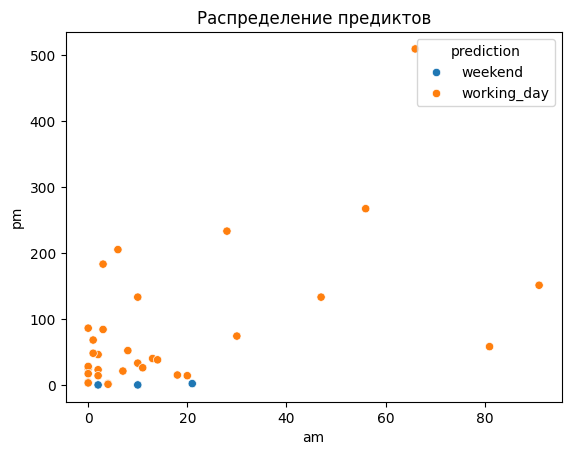

In [11]:
sns.scatterplot(x='am', y='pm', hue='prediction', data=df)
plt.title("Распределение предиктов")  
plt.xlabel("am")  
plt.ylabel("pm")  
plt.show() 

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.

In [12]:
y_pred = logreg.predict(X_test)

In [13]:
most_common_class = df['target'].mode()[0]
print(f"Most common class: {most_common_class}")

Most common class: working_day


In [14]:
naive_predictions = [most_common_class] * len(df)
df['naive_prediction'] = naive_predictions

In [15]:
naive_accuracy = accuracy_score(df['target'], df['naive_prediction'])
print(f"Naive model accuracy: {naive_accuracy:.4f}")

Naive model accuracy: 0.7143


In [16]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)
model_predictions = model.predict(X)
model_accuracy = accuracy_score(y, model_predictions)

print(f"Logistic Regression accuracy: {model_accuracy:.4f}")
print(f"Improvement over naive model: {model_accuracy - naive_accuracy:.4f}")

Logistic Regression accuracy: 0.6286
Improvement over naive model: -0.0857
